<a href="https://colab.research.google.com/github/Briskwoods/Machine-Learning-Groupwork-Task-1/blob/master/Ridge_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import os
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
download = drive.CreateFile({'id':'1NnEbiLsWH5V5TPtvZiIrTSPQYB2X3wRS'})
download.GetContentFile('data.csv')

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [13]:
df = pd.read_csv('data.csv')
df #is data variable

,size_in_sq_ft,price_x1000_sh
0,32.502345,31.707006
1,53.426804,68.777596
2,61.530358,62.562382
3,47.475640,71.546632
4,59.813208,87.230925
...,...,...
95,50.030174,81.536991
96,49.239765,72.111832
97,50.039576,85.232007
98,48.149859,66.224958


In [0]:
#variables
m = 0
c = 0
L = 0.0001 #learning rate
epochs = 100
lambdaVal = 1.5
epoch_error_list = []
epoch_count_list = []


In [15]:
X = df['size_in_sq_ft']
Y = df['price_x1000_sh'] 

N = float(len(X))
print(X)

0     32.502345
1     53.426804
2     61.530358
3     47.475640
4     59.813208
        ...    
95    50.030174
96    49.239765
97    50.039576
98    48.149859
99    25.128485
Name: size_in_sq_ft, Length: 100, dtype: float64


In [0]:
def ridge_reg(N,Y,Y_hat,lambdaVal,weights): #L2 regularization function
  return (1/N)*sum(Y-Y_hat)**2 + (lambdaVal)* (m)**2

# **L2 Regression/ Ridge regression**
It forces weights toward zero but it doesn't make them exactly zero. It removes a small percentage of weights at each iteration.

In our case the model has only one weight, **the slope**, we square its value times the value of lambda in each iterartion.The new function will be:

(1/N)*sum(Y-Y_hat)**2 + (lambdaVal)* (m)**2 

When performing optimization through gradient descent the new function will be:

d/dm = (-2/N)*sum(X*(Y-Y_hat)) - 2 * lambdaVal * m 

In [0]:
#main function 
def gradient_descent_fit(m,c,N,L):
  epoch_error_list = []
  epoch_count_list = []
 
  for i in  range(epochs):
    Y_hat = m*X+c
    #partial derivative
    epoch_count_list=epoch_count_list[:]#trick the list to get its instace
    epoch_count_list.append(i)
    epoch_error = ridge_reg(N,Y,Y_hat,lambdaVal,m)
    epoch_error_list=epoch_error_list[:]
    epoch_error_list.append(epoch_error)
    #minimize the error function by computing partial derivatives
    D_m = (-2/N)*sum(X*(Y-Y_hat)) - 2 * lambdaVal * m  
    D_c = (-2/N)*sum(Y-Y_hat) - lambdaVal
    #Apply gradient descent formular to update both m and c into new values
    m = m - (L*D_m)
    c = c - (L*D_c) 
    
  print("Final M is:", m, "Final c is:", c)
  return Y_hat,epoch_count_list,epoch_error_list,m


Final M is: 1.4794210154107064 Final c is: 0.049226906571477366


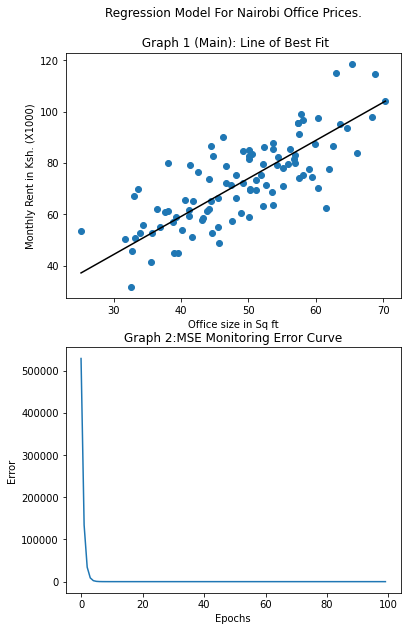

In [20]:
#call gradient descent fit function
returned_params=gradient_descent_fit(m,c,N,L)
y_predicted=returned_params[0]
total_epochs=returned_params[1]
all_epoch_errors=returned_params[2]
all_weights=returned_params[3]

#create plot for both line of best fit and error reduction graphs
fig,(ax1,ax2) = plt.subplots(2,gridspec_kw={'top':2})
ax1.set(xlabel="Office size in Sq ft")
ax1.set(ylabel="Monthly Rent in Ksh. (X1000)")
ax1.set_title("Regression Model For Nairobi Office Prices.\n\n Graph 1 (Main): Line of Best Fit")
ax1.scatter(X,Y)
ax1.plot([min(X),max(X)],[min(y_predicted),max(y_predicted)],color='black')#plots the line of best fit

ax2.set_title("Graph 2:MSE Monitoring Error Curve")
ax2.set(xlabel="Epochs")
ax2.set(ylabel="Error")
ax2.plot(total_epochs,all_epoch_errors)

#Destroy the used lists to prevent recarpetting on append
epoch_count_list.clear()
epoch_error_list.clear()